<a href="https://colab.research.google.com/github/Juniorffonseca/processo_seletivo/blob/main/teste_processo_seletivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.** Traga insumos para validação ou refutação das seguintes hipóteses:

**1.1.** Ao longo do tempo é possível observar uma mudança na preferência de
escolha de medicamento do médico;

In [1]:
# Carregando pacotes
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from datetime import datetime as dt
from datetime import timedelta


In [4]:
# Importando arquivos csv
uploaded = files.upload()

Saving medicos.csv to medicos.csv
Saving membros.csv to membros.csv
Saving prescricoes.csv to prescricoes.csv
Saving visitados.csv to visitados.csv


In [2]:
# Gerando uma lista com cores que serão utilizadas em todos os plots
# aleatorio = [0, 0, 0]

# for i in range(3):
#     aleatorio[i] = np.random.rand()

lista = plt.cm.plasma_r([0.9817771747683106,
                         0.19557047808372098,
                         0.63000000000000])

lista [1] = plt.cm.ocean(0.7)
lista [2] = plt.cm.Reds(0.9)

lista_datas = ['10/20', '11/20', '12/20', '01/21', '02/21', '03/21', '04/21', '05/21', '06/21', # Gerando uma lista com as datas em ordem para usar nos xticks das plotagens
                  '07/21', '08/21', '09/21', '10/21', '11/21', '12/21', '01/22', '02/22', '03/22',
                  '04/22', '05/22', '06/22', '07/22', '08/22', '09/22']

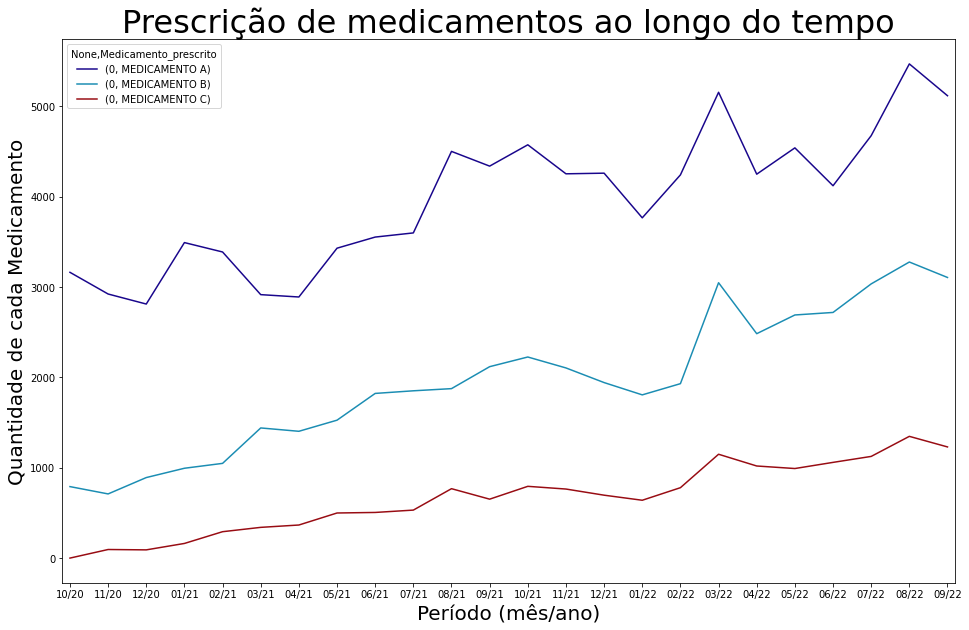

In [5]:
# Carregando csv em uma variável
prescricoes = pd.read_csv('prescricoes.csv', sep = ';', encoding='latin-1')

prescricoes = prescricoes[['Medicamento_prescrito', 'Mes_prescricao']].value_counts().to_frame()
prescricoes = prescricoes.reset_index()

prescricoes['Mes_prescricao'] = list(map(str, prescricoes['Mes_prescricao']))

prescricoes = prescricoes.pivot(index='Mes_prescricao', columns='Medicamento_prescrito')

x_inicial = -0.2
x_final = len(prescricoes.index) - 0.8

prescricoes.plot(kind = 'line', stacked = 0, figsize = (16, 10), alpha = 1, color = lista, xlim = (x_inicial, x_final))
plt.xticks(range(0, len(lista_datas), 1), lista_datas)
plt.title('Prescrição de medicamentos ao longo do tempo', size = 32)
plt.xlabel('Período (mês/ano)', size = 20)
plt.ylabel('Quantidade de cada Medicamento', size = 20)
plt.show()


É possível notar que não houve mudança na preferência de escolha na prescrição de medicamento do médico, entretanto é possível notar que todos os medicamentos estão sendo constantemente mais recomendados ao longo do tempo. Isso pode se dar por diversos fatores, como, aumento frequente do número de médicos que se tornam membros, anúncios e visitas dos representantes dos medicamentos.

**1.2.** Existem outros fatores que influenciam na tomada de decisão de qual
medicamento o médico irá prescrever (geográfico e/ou especialidade médica
e/ou temporal);

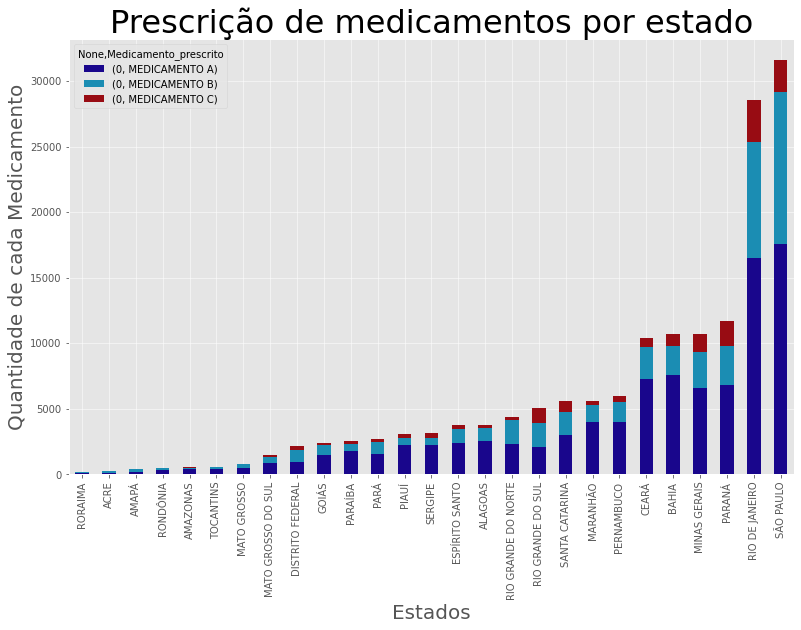

In [ ]:
# Recarregando arquivo csv em outra variável
prescricoes_2 = pd.read_csv('prescricoes.csv', sep = ';', encoding='latin-1')

prescricoes_2 = prescricoes_2[['Medicamento_prescrito', 'Estado']].value_counts().to_frame()
prescricoes_2 = prescricoes_2.reset_index()

prescricoes_2['Estado'] = list(map(str, prescricoes_2['Estado']))

prescricoes_2 = prescricoes_2.pivot(index='Estado', columns='Medicamento_prescrito')

prescricoes_2['Media_medicamentos'] = prescricoes_2.mean(axis=1)

prescricoes_2 = prescricoes_2.sort_values('Media_medicamentos')

del prescricoes_2['Media_medicamentos']

prescricoes_2.plot(kind = 'bar', stacked = 1, figsize = (13, 8), alpha = 1, color = lista)
plt.title('Prescrição de medicamentos por estado', size = 32)
plt.xlabel('Estados', size = 20)
plt.ylabel('Quantidade de cada Medicamento', size = 20)
plt.show()

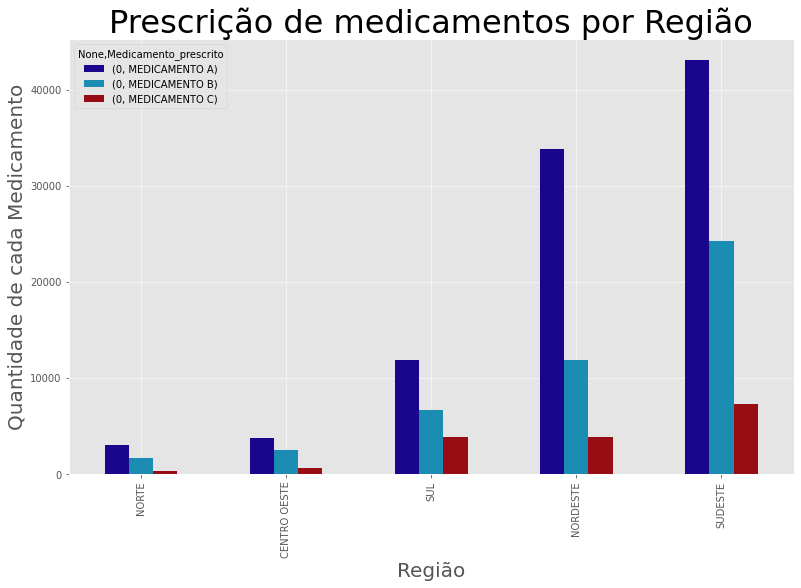

In [ ]:
prescricoes_3 = pd.read_csv('prescricoes.csv', sep = ';', encoding='latin-1') # Recarregando arquivo csv em outra variável

prescricoes_3 = prescricoes_3[['Medicamento_prescrito', 'Regiao']].value_counts().to_frame()
prescricoes_3 = prescricoes_3.reset_index()

prescricoes_3['Regiao'] = list(map(str, prescricoes_3['Regiao']))

prescricoes_3 = prescricoes_3.pivot(index='Regiao', columns='Medicamento_prescrito')

prescricoes_3['Media_medicamentos'] = prescricoes_3.mean(axis=1)

prescricoes_3 = prescricoes_3.sort_values('Media_medicamentos')

del prescricoes_3['Media_medicamentos']

prescricoes_3.plot(kind = 'bar', stacked = 0, figsize = (13, 8), alpha = 1, color = lista)
plt.title('Prescrição de medicamentos por Região', size = 32)
plt.xlabel('Região', size = 20)
plt.ylabel('Quantidade de cada Medicamento', size = 20)
plt.show()


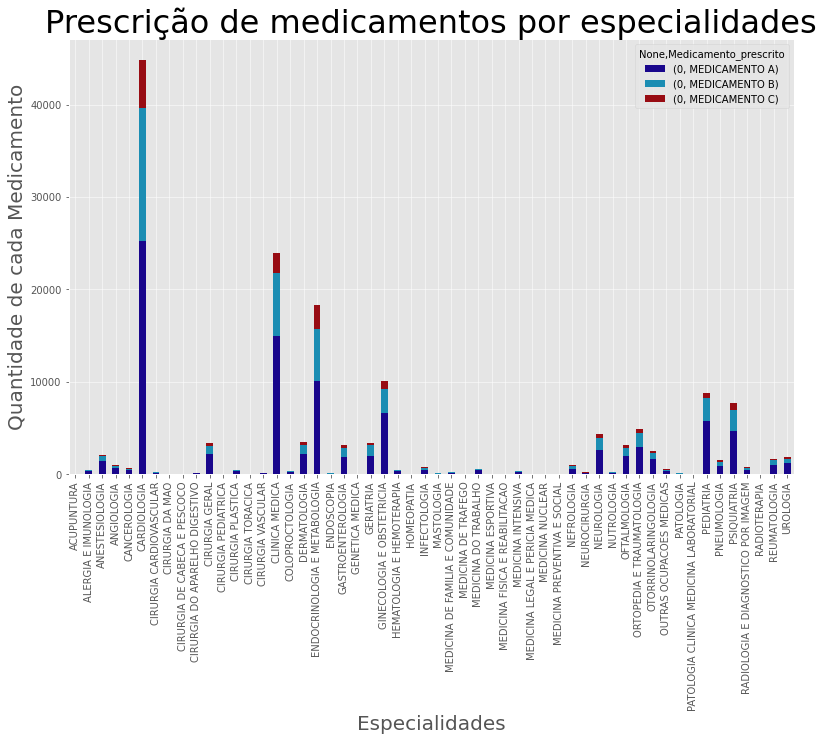

In [ ]:
prescricoes_4 = pd.read_csv('prescricoes.csv', sep = ';', encoding='latin-1') # Recarregando arquivo csv em outra variável

prescricoes_4 = prescricoes_4[['Medicamento_prescrito', 'Especialidade']].value_counts().to_frame() # Fazendo a contagem de Medicamentos prescritos por especialidades e passando para dataframe.
prescricoes_4 = prescricoes_4.reset_index() # Resetando os indexs

prescricoes_4['Especialidade'] = list(map(str, prescricoes_4['Especialidade'])) # Usando map nas especialidades como strings e retornando como lista para a coluna 'Especialidade' do df prescricoes_2.

prescricoes_4 = prescricoes_4.pivot(index='Especialidade', columns='Medicamento_prescrito') # Transformando a coluna de Especialidades em Indexs e deixando apenas os Medicamentos como colunas.

prescricoes_4.plot(kind = 'bar', stacked = 1, figsize = (13, 8), alpha = 1, color = lista) # Fazendo plot de barras estacadas com tamanho 13x8, com total opacidade e com cores da lista de cores feita anteriormente.
plt.title('Prescrição de medicamentos por especialidades', size = 32) # Definindo o título e o tamanho do mesmo.
plt.xlabel('Especialidades', size = 20) # Tamanho e label do eixo x.
plt.ylabel('Quantidade de cada Medicamento', size = 20) # Tamanho e label do eixo y.
plt.show() # Plotagem


**1.3.** Existe uma relação sazonal na escolha do médico pelos medicamentos;

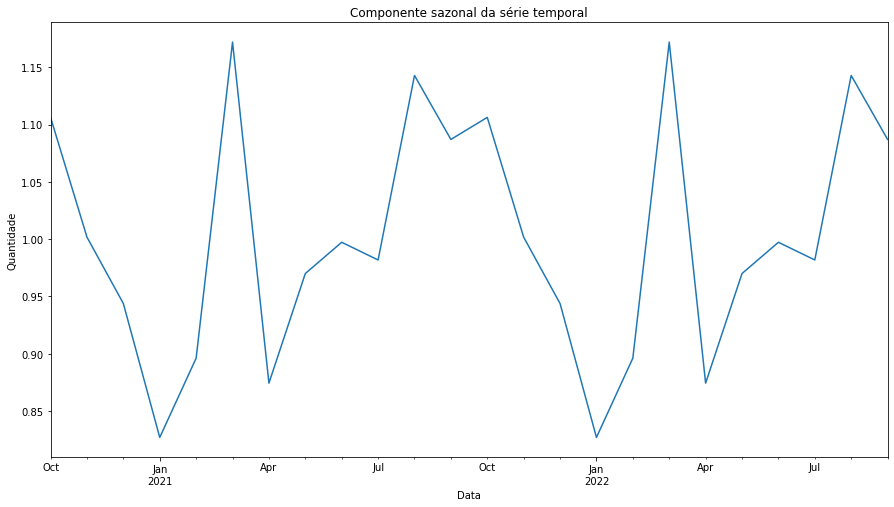

In [66]:
# Carregando csv em uma variável
prescricoes_5 = pd.read_csv('prescricoes.csv', sep = ';', encoding='latin-1')

# Importar biblioteca statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

prescricoes_5['Mes_prescricao'] = pd.to_datetime(prescricoes_5['Mes_prescricao'], format='%Y%m')
prescricoes_5 = prescricoes_5.set_index('Mes_prescricao').groupby(pd.Grouper(freq='M'))['Medicamento_prescrito'].count()
result = seasonal_decompose(prescricoes_5, model='multiplicative', period=12)
seasonal = result.seasonal
ax = seasonal.plot(figsize = (15, 8))
plt.title('Componente sazonal da série temporal')

plt.xlabel('Data')
plt.ylabel('Quantidade')
plt.show()

**1.4.** Existe relação entre tornar-se membro da comunidade e/ou ser visitado com
o número de prescrições para cada um dos medicamentos;


In [ ]:
membros = pd.read_csv('membros.csv', sep = ';', encoding = 'latin-1')
prescricoes_6 = pd.read_csv('prescricoes.csv', sep = ';', encoding = 'latin-1')





In [ ]:
visitados = pd.read_csv('visitados.csv', sep = ';', encoding = 'latin-1')
prescricoes_7 = pd.read_csv('prescricoes.csv', sep = ';', encoding = 'latin-1')
